# PART 1 - TASK 5D

# Object Detection With Azure Computer Vision API

In [ ]:
!pip install requests pillow matplotlib ipywidgets --quiet

In [ ]:
import requests                                                               # Allows to send HTTP requests easily in python
from PIL import Image, ImageDraw, ImageFont                                   # Allows to manipulate images by drawing on them say and use custom fonts
from io import BytesIO                                                        # Allows to handle image data as a byte stream
import matplotlib.pyplot as plt                                               # Used for plotting charts and images
import ipywidgets as widgets                                                  # Helps in having interactive displays with text boxes, buttons, sliders etc
from IPython.display import display                                           # allows to display images, widgets in python


# === Azure Credentials ===
subscription_key = "your-key-here"
endpoint = "your-endpoint-here"
analyze_url = endpoint + "/vision/v3.2/analyze?visualFeatures=Objects"


In [ ]:
# Create a file upload widget
upload = widgets.FileUpload(accept='image/*', multiple=False)
display(upload)


FileUpload(value={}, accept='image/*', description='Upload')

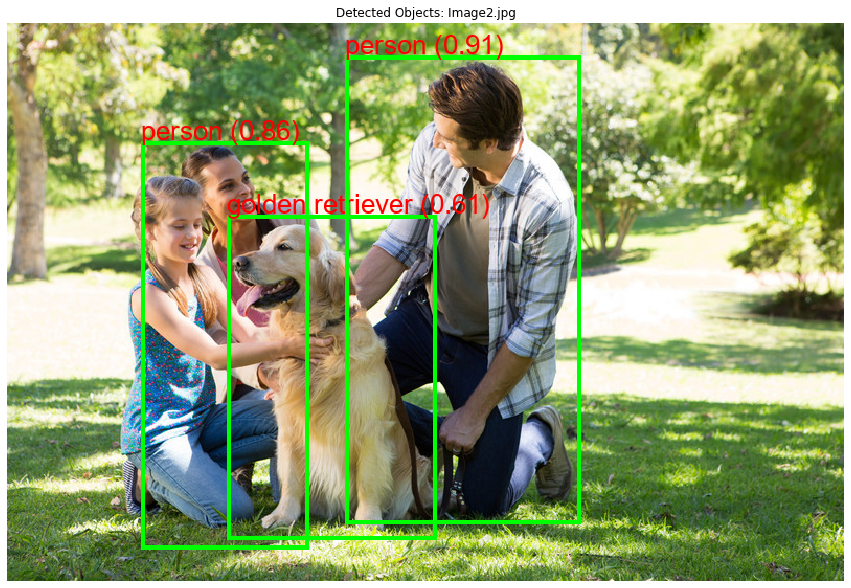


========== DETECTED OBJECTS in 'Image2.jpg' ==========

>>> PERSON               | Confidence: 0.86
>>> GOLDEN RETRIEVER     | Confidence: 0.61
>>> PERSON               | Confidence: 0.91



In [ ]:
def detect_uploaded_image(upload_widget):
    if not upload_widget.value:
        print("Please upload an image first.")
        return

    # Extract uploaded file content
    for name, file_info in upload_widget.value.items():
        image_bytes = file_info['content']
        global image_name
        image_name = name


        # Send request to Azure Vision API
        headers = {
            "Ocp-Apim-Subscription-Key": subscription_key,
            "Content-Type": "application/octet-stream"
        }
        response = requests.post(analyze_url, headers=headers, data=image_bytes)
        response.raise_for_status()
        global analysis
        analysis = response.json()



        # Load and draw on the image
        image = Image.open(BytesIO(image_bytes)).convert("RGB")
        draw = ImageDraw.Draw(image)

        # Try to use a larger font
        try:
            font = ImageFont.truetype("arial.ttf", size=26)  # Change size as needed
        except IOError:
            font = ImageFont.load_default()  # Fallback font

        for obj in analysis['objects']:
            rect = obj['rectangle']
            label = obj['object']
            conf = obj['confidence']
            x, y, w, h = rect['x'], rect['y'], rect['w'], rect['h']
            draw.rectangle([(x, y), (x + w, y + h)], outline="lime", width=4)
            draw.text((x, y - 25), f"{label} ({conf:.2f})", fill="Red", font=font)

        # Display image with bounding boxes
        plt.figure(figsize=(15, 12))
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Detected Objects: {image_name}")
        plt.show()

        # Display text output in the notebook
        print(f"\n========== DETECTED OBJECTS in '{image_name}' ==========\n")
        for obj in analysis['objects']:
            print(f">>> {obj['object'].upper():<20} | Confidence: {obj['confidence']:.2f}")
        print("\n=========================================================")

# Run the detection
detect_uploaded_image(upload)


In [ ]:
# Display object details with bounding box coordinates
print("\nDetected Object Coordinates:")
for idx, obj in enumerate(analysis['objects'], start=1):
    label = obj['object']
    conf = obj['confidence']
    rect = obj['rectangle']
    x, y, w, h = rect['x'], rect['y'], rect['w'], rect['h']

    print(f"{idx}. {label.upper()} – Confidence: {conf:.2f}")
    print(f"   Bounding Box → X: {x}, Y: {y}, Width: {w}, Height: {h}\n")



Detected Object Coordinates:
1. PERSON – Confidence: 0.86
   Bounding Box → X: 128, Y: 113, Width: 160, Height: 389

2. GOLDEN RETRIEVER – Confidence: 0.61
   Bounding Box → X: 210, Y: 183, Width: 200, Height: 310

3. PERSON – Confidence: 0.91
   Bounding Box → X: 323, Y: 31, Width: 225, Height: 447



In [ ]:
import json

# Display the JSON response
print(f"JSON Output for image:{image_name}")
print(json.dumps(analysis, indent=4))


JSON Output for image:Image2.jpg
{
    "objects": [
        {
            "rectangle": {
                "x": 128,
                "y": 113,
                "w": 160,
                "h": 389
            },
            "object": "person",
            "confidence": 0.857
        },
        {
            "rectangle": {
                "x": 210,
                "y": 183,
                "w": 200,
                "h": 310
            },
            "object": "golden retriever",
            "confidence": 0.606,
            "parent": {
                "object": "retriever",
                "confidence": 0.666,
                "parent": {
                    "object": "dog",
                    "confidence": 0.915,
                    "parent": {
                        "object": "mammal",
                        "confidence": 0.918,
                        "parent": {
                            "object": "animal",
                            "confidence": 0.918
                        }
   